In [1]:
import numpy as np
import imageio
from matplotlib import pyplot as plt
import math

In [2]:
class OutputBitstream:
    def __init__(self, filename):
        self.filename = filename
       
    def __enter__(self):
        self.word = 0
        self.word_bits = 0
        self.file = open(self.filename, "wb")
        return self
       
    def write(self, value, length):
        assert isinstance(value, int), "value must be integer"
        assert isinstance(length, int), "length must be integer"
        assert value >= 0, "value must be non negative"
        assert value < 2 ** length, "value must be smaller than 2 ** length"
       
        self.word <<= length
        self.word |= value
        self.word_bits += length
   
        if self.word_bits >= 64:
            remaining = self.word_bits - 64
            self.file.write((self.word >> remaining).to_bytes(8, byteorder="big", signed=False))
            self.word &= (1 << remaining) - 1
            self.word_bits = remaining
   
    def __exit__(self, exc_type, exc_val, exc_tb):
        if self.word_bits != 0:
            self.write(0, 64 - self.word_bits)
           
        self.file.close()

In [3]:
class InputBitstream:
    def __init__(self, filename):
        self.filename = filename
       
    def __enter__(self):
        self.word = 0
        self.word_bits = 0
        self.file = open(self.filename, "rb")
        return self
       
    def read(self, length):
        assert length < 8 * 32, "length is too large"
       
        if length > self.word_bits:
            value = self.file.read(32)
            self.word <<= len(value) * 8
            self.word_bits += len(value) * 8
            self.word |= int.from_bytes(value, byteorder="big", signed=False)
           
        if length > self.word_bits:
            raise "Unexpected end of file"
               
        result = self.word >> (self.word_bits - length)
        self.word_bits -= length
        self.word &= (1 << self.word_bits) - 1
       
        return result
   
    def __exit__(self, exc_type, exc_val, exc_tb):    
        self.file.close()

---------
12
[255 255 255 255 255 255 255 255 255 255 255 255 151   0  23 255  87 151
 255 255  23 215 255 255 255 255  87 151 255 255  23   0   0   0  23 255
  87 151 255 255  23 215 151   0  23 255 255 151  87 255 255 255 255 215
  23 255 255 151  87 255  23   0 151 255 255 255 255 151  87 255 255  87
 151 255 255  23   0   0   0  23 255  87 151 255 255 255 255 151  87 255
 255  87   0  87 255  23 215 255 215  23 255 255 151   0   0   0   0 151
 215  23 255 255 255 215   0   0   0   0  87 255  23 215 151  87 255  23
 215 255 215   0   0   0   0  87 255 255  87 151 255 255  23   0 151 255
 255 255  87 151 255 255  23 215 151   0   0   0   0 151 255 255  23 215
 255 215   0   0   0 151 255 255 255  87   0  87 255  23 215 151   0  23
 255 255 255 215   0   0   0 151 215  23 255  87   0  87 255 255 255 255
 255 255 255 255 255 255 255 255]
La fila es repeteix fins la fila 100


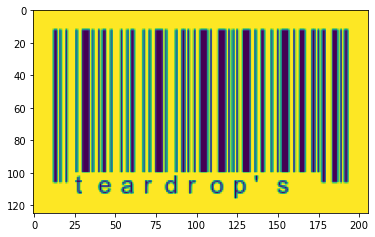

In [17]:
img = imageio.imread("barcodes/sample-000001.png")
plt.imshow(img) #im

primeraLinea = 0
segonaLinea = 0
ultimaRepetida = 0

for fila in range(img.shape[0]):
    for columna in range(img.shape[1]):
        if img[fila][columna] != 255:
            if primeraLinea == 0:
                primeraLinea = fila
                segonaLinea = fila+1


segonaLinea = img[segonaLinea]

for x in range(primeraLinea+1, img.shape[0]):
    
    if False in (img[x] == segonaLinea):
        if ultimaRepetida == 0:
            ultimaRepetida = x

print('---------')
print(primeraLinea)
print(segonaLinea)
print("La fila es repeteix fins la fila", ultimaRepetida)


In [24]:
print(img[primeraLinea])
print(img[primeraLinea+1])

[255 255 255 255 255 255 255 255 255 255 255 255 203 127 139 255 171 203
 255 255 139 235 255 255 255 255 171 203 255 255 139 127 127 127 139 255
 171 203 255 255 139 235 203 127 139 255 255 203 171 255 255 255 255 235
 139 255 255 203 171 255 139 127 203 255 255 255 255 203 171 255 255 171
 203 255 255 139 127 127 127 139 255 171 203 255 255 255 255 203 171 255
 255 171 127 171 255 139 235 255 235 139 255 255 203 127 127 127 127 203
 235 139 255 255 255 235 127 127 127 127 171 255 139 235 203 171 255 139
 235 255 235 127 127 127 127 171 255 255 171 203 255 255 139 127 203 255
 255 255 171 203 255 255 139 235 203 127 127 127 127 203 255 255 139 235
 255 235 127 127 127 203 255 255 255 171 127 171 255 139 235 203 127 139
 255 255 255 235 127 127 127 203 235 139 255 171 127 171 255 255 255 255
 255 255 255 255 255 255 255 255]
[255 255 255 255 255 255 255 255 255 255 255 255 151   0  23 255  87 151
 255 255  23 215 255 255 255 255  87 151 255 255  23   0   0   0  23 255
  87 151 255 255 

In [28]:
#Obtenir la primera a partir de la segona --> mitja del valor i color blanc(255)
computedPrimera = []

for el in img[primeraLinea+1]:
    newVal = (el+255)//2
    if newVal> (el+(255//2)+0.5):
        newVal+=1
    computedPrimera.append(newVal)

print(computedPrimera == img[primeraLinea])

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

In [5]:
for i in range(2,4):
    print(i)
    if i ==2:
        break;

2


In [6]:
img.shape[0]

125

In [3]:
#Fins ara tenim una funcio que retorna la ultima fila que es repeteix dins del barcode
# codeBook = primeraLinia + SegonaLinia + totes les linies que no es repeteixen
# a cada linia li podem dir codeword
# per ara hardcodegem les mesures, ja les enviarem

codeBook =[]
codeBook.append(img[primeraLinea])
codeBook.append(segonaLinea)

wordImage = []

for i in range(ultimaRepetida, img.shape[0]):
    for value in img[i]:   
        wordImage.append(value)
    codeBook.append(img[i])
#wordImageNP = np.array(wordImage)
#wordImageNP.resize(img.shape[1],img.shape[0]-ultimaRepetida)

print("Generat Codebook")


Generat Codebook


In [11]:
#Escribim el codeBook
with OutputBitstream("quantized.bin") as f:
    f.write(img.shape[0], 32)
    f.write(img.shape[1], 32)
    f.write(len(codeBook), 32)
    #write codebbook
    #tambe hauriem d'afegir els index de primeraLinea i ultimaRepetida
    for codeword in codeBook:
        for value in codeword:
            f.write(int(value), 8)
#surt un binari de 6KB quan la foto es de 1KB, mu mal


In [12]:
with InputBitstream("quantized.bin") as f:
    x = f.read(32)
    y = f.read(32)
    lenCodeBook = f.read(32)
    
    recoveredImage = np.empty((x,y), dtype="uint8")
    
    liniesBlanques = np.arange(y)
    liniesBlanques.fill(255)

    for indexLiniaBlanca in range(0,12): #12 pot ser primeraLinea
        recoveredImage[indexLiniaBlanca] = (liniesBlanques[indexLiniaBlanca])
        #recoveredImage.append(liniesBlanques[indexLiniaBlanca])
    #fins aqui omplim les primeres linies de blanc
    inedxMatriu=12
    #for codeWord in codeBook:
    valor=ultimaRepetida
    for index in range (0,lenCodeBook):
        codeWord= f.read(8)
        if i==0:
            recoveredImage[12] = codeWord
            #recoveredImage.append(codeWord)
        else:
            if index==1:
                for comuns in range(primeraLinea+1, ultimaRepetida):
                    recoveredImage[comuns] = codeWord
                    #recoveredImage.append(codeWord)
            else:
                recoveredImage[ultimaRepetida+index] = codeWord
                #recoveredImage.append(codeWord)

    img2 = np.array(recoveredImage).reshape(img.shape[0], img.shape[1])
   
    
    

IndexError: index 125 is out of bounds for axis 0 with size 125

In [13]:
#Aqui comencem a generar la imatge a partir del Codebook
#aqui no estic segur si es int64 o uint64, i img.shape esta hardcoded es pasara pel binari
#recoveredImage = np.empty((img.shape[0],img.shape[1]), dtype="uint8")
recoveredImage = np.empty((x,y), dtype="uint8")
#recoveredImage=[]
liniesBlanques = np.arange(img.shape[1])
liniesBlanques.fill(255)

for indexLiniaBlanca in range(0,12): #12 pot ser primeraLinea
    recoveredImage[indexLiniaBlanca] = (liniesBlanques[indexLiniaBlanca])
    #recoveredImage.append(liniesBlanques[indexLiniaBlanca])
#fins aqui omplim les primeres linies de blanc
inedxMatriu=12
#for codeWord in codeBook:
valor=ultimaRepetida
for index,codeWord in enumerate(codeBook):
    if index==0:
        recoveredImage[12] = codeWord
        #recoveredImage.append(codeWord)
    else:
        if index==1:
            for comuns in range(primeraLinea+1, ultimaRepetida):
                recoveredImage[comuns] = codeWord
                #recoveredImage.append(codeWord)
        else:
            recoveredImage[ultimaRepetida+index-2] = codeWord
            #recoveredImage.append(codeWord)

img2 = np.array(recoveredImage).reshape(img.shape[0], img.shape[1])

    

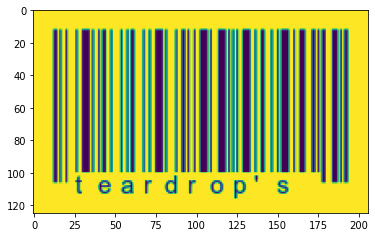

In [14]:
plt.imshow(img2)

In [15]:
def getMSE(img1, img2):  # MSE of 2 images
    return (np.sum(np.square(img1 - img2))) / img1.size

print(getMSE(img,img2))

0.0


In [22]:
#Huffman Coding
#Obtenim  l''string i escomputa la freq de cada caracter a l'string
#es calculen prob
#es compute huffman c (length, variance and entrpy)
probabilities = []

class HuffmanCode:
    def __init__(self,probability):
        self.probability = probability

    def position(self, value, index):
        for j in range(len(self.probability)):
            if(value >= self.probability[j]):
                return j
        return index-1

    def characteristics_huffman_code(self, code):
        length_of_code = [len(k) for k in code]

        mean_length = sum([a*b for a, b in zip(length_of_code, self.probability)])

        print("Average length of the code: %f" % mean_length)
        print("Efficiency of the code: %f" % (entropy_of_code/mean_length))

    def compute_code(self):
        num = len(self.probability)
        huffman_code = ['']*num

        for i in range(num-2):
            val = self.probability[num-i-1] + self.probability[num-i-2]
            if(huffman_code[num-i-1] != '' and huffman_code[num-i-2] != ''):
                huffman_code[-1] = ['1' + symbol for symbol in huffman_code[-1]]
                huffman_code[-2] = ['0' + symbol for symbol in huffman_code[-2]]
            elif(huffman_code[num-i-1] != ''):
                huffman_code[num-i-2] = '0'
                huffman_code[-1] = ['1' + symbol for symbol in huffman_code[-1]]
            elif(huffman_code[num-i-2] != ''):
                huffman_code[num-i-1] = '1'
                huffman_code[-2] = ['0' + symbol for symbol in huffman_code[-2]]
            else:
                huffman_code[num-i-1] = '1'
                huffman_code[num-i-2] = '0'

            position = self.position(val, i)
            probability = self.probability[0:(len(self.probability) - 2)]
            probability.insert(position, val)
            if(isinstance(huffman_code[num-i-2], list) and isinstance(huffman_code[num-i-1], list)):
                complete_code = huffman_code[num-i-1] + huffman_code[num-i-2]
            elif(isinstance(huffman_code[num-i-2], list)):
                complete_code = huffman_code[num-i-2] + [huffman_code[num-i-1]]
            elif(isinstance(huffman_code[num-i-1], list)):
                complete_code = huffman_code[num-i-1] + [huffman_code[num-i-2]]
            else:
                complete_code = [huffman_code[num-i-2], huffman_code[num-i-1]]

            huffman_code = huffman_code[0:(len(huffman_code)-2)]
            huffman_code.insert(position, complete_code)

        huffman_code[0] = ['0' + symbol for symbol in huffman_code[0]]
        huffman_code[1] = ['1' + symbol for symbol in huffman_code[1]]

        if(len(huffman_code[1]) == 0):
            huffman_code[1] = '1'

        count = 0
        final_code = ['']*num

        for i in range(2):
            for j in range(len(huffman_code[i])):
                final_code[count] = huffman_code[i][j]
                count += 1

        final_code = sorted(final_code, key=len)
        return final_code

In [7]:
def rel_freq(x):
    freqs = [(value, x.count(value) / len(x)) for value in set(x)] 
    return freqs

In [12]:
freq= rel_freq(wordImage)

length = len(wordImage)
probabilities = sorted(freq, reverse=True)
huffmanClassObject = (probabilities)
P = probabilities


In [11]:
print(probabilities)

[(255, 0.8912621359223301), (254, 0.0001941747572815534), (253, 0.0003883495145631068), (252, 0.000970873786407767), (251, 0.002524271844660194), (250, 0.0007766990291262136), (248, 0.0001941747572815534), (247, 0.0033009708737864077), (245, 0.0005825242718446602), (244, 0.0001941747572815534), (243, 0.0005825242718446602), (242, 0.0001941747572815534), (241, 0.0001941747572815534), (240, 0.0007766990291262136), (239, 0.0001941747572815534), (238, 0.0005825242718446602), (237, 0.0001941747572815534), (236, 0.0003883495145631068), (232, 0.0005825242718446602), (230, 0.0003883495145631068), (229, 0.0007766990291262136), (228, 0.0001941747572815534), (226, 0.0001941747572815534), (225, 0.0001941747572815534), (224, 0.0003883495145631068), (223, 0.000970873786407767), (222, 0.0005825242718446602), (221, 0.0003883495145631068), (220, 0.0001941747572815534), (218, 0.0005825242718446602), (217, 0.0003883495145631068), (216, 0.000970873786407767), (215, 0.004077669902912621), (213, 0.000776699

In [ ]:


huffman_code = huffmanClassObject.compute_code()

print(' Value | Huffman code ')
print('----------------------')

for id,char in enumerate(freq):
    if huffman_code[id]=='':
        print(' %-4r |%12s' % (char[0], 1))
        continue
    print(' %-4r |%12s' % (char[0], huffman_code[id]))

huffmanClassObject.characteristics_huffman_code(huffman_code)

In [ ]:
#el codi hufmman que he provat era per paraules i no va be

In [ ]:
#podem deixar aquesta ultima cell sempre per ser un to-do list
#Per ara tenim fins a la linia 100 aprox 
#podriem calcular la segona linia diferent a partir de la primera
#sabent els espais en blanc de la primera fila no faria falta tornar a guardarho
#podem calcular un huffman per codificar la paraula
#sembla que hi ha un error a la cell 12

In [53]:
def rle_encode(data):
    encoding = []
    prev_char = ''
    count = 1

    for el in data:
        if el != prev_char:

            if prev_char != '':
                encoding.append(count)
                encoding.append(prev_char)
                
            count = 1
            prev_char = el
        else:
            count += 1
    else:
        encoding.append(count)
        encoding.append(prev_char)
        return encoding

In [54]:

test = [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 151,   0,  23, 255,  87, 151,
 255, 255,  23, 215, 255, 255, 255, 255,  87, 151, 255, 255,  23,   0,   0,   0,  23, 255,
  87, 151, 255, 255,  23, 215, 151,   0,  23, 255, 255, 151,  87, 255, 255, 255, 255, 215,
  23, 255, 255, 151,  87, 255,  23,   0, 151, 255, 255, 255, 255, 151,  87, 255, 255,  87,
 151, 255, 255,  23,   0,   0,   0,  23, 255,  87, 151, 255, 255, 255, 255, 151,  87, 255,
 255,  87,   0,  87, 255,  23, 215, 255, 215,  23, 255, 255, 151,   0,   0,   0,   0, 151,
 215,  23, 255, 255, 255, 215,   0,   0,   0,   0,  87, 255,  23, 215, 151,  87, 255,  23,
 215, 255, 215,   0,   0,   0,   0,  87, 255, 255,  87, 151, 255, 255,  23,   0, 151, 255,
 255, 255,  87, 151, 255, 255,  23, 215, 151,   0,   0,   0,   0, 151, 255, 255,  23, 215,
 255, 215,   0,   0,   0, 151, 255, 255, 255,  87,   0,  87, 255,  23, 215, 151,   0,  23,
 255, 255, 255, 215,   0,   0,   0, 151, 215,  23, 255,  87,   0,  87, 255, 255, 255, 255,
 255, 255, 255, 255, 255, 255, 255, 255]


encoded_val = rle_encode(test)
print(encoded_val)
print(len(encoded_val))
print(len(test))

[12, 255, 1, 151, 1, 0, 1, 23, 1, 255, 1, 87, 1, 151, 2, 255, 1, 23, 1, 215, 4, 255, 1, 87, 1, 151, 2, 255, 1, 23, 3, 0, 1, 23, 1, 255, 1, 87, 1, 151, 2, 255, 1, 23, 1, 215, 1, 151, 1, 0, 1, 23, 2, 255, 1, 151, 1, 87, 4, 255, 1, 215, 1, 23, 2, 255, 1, 151, 1, 87, 1, 255, 1, 23, 1, 0, 1, 151, 4, 255, 1, 151, 1, 87, 2, 255, 1, 87, 1, 151, 2, 255, 1, 23, 3, 0, 1, 23, 1, 255, 1, 87, 1, 151, 4, 255, 1, 151, 1, 87, 2, 255, 1, 87, 1, 0, 1, 87, 1, 255, 1, 23, 1, 215, 1, 255, 1, 215, 1, 23, 2, 255, 1, 151, 4, 0, 1, 151, 1, 215, 1, 23, 3, 255, 1, 215, 4, 0, 1, 87, 1, 255, 1, 23, 1, 215, 1, 151, 1, 87, 1, 255, 1, 23, 1, 215, 1, 255, 1, 215, 4, 0, 1, 87, 2, 255, 1, 87, 1, 151, 2, 255, 1, 23, 1, 0, 1, 151, 3, 255, 1, 87, 1, 151, 2, 255, 1, 23, 1, 215, 1, 151, 4, 0, 1, 151, 2, 255, 1, 23, 1, 215, 1, 255, 1, 215, 3, 0, 1, 151, 3, 255, 1, 87, 1, 0, 1, 87, 1, 255, 1, 23, 1, 215, 1, 151, 1, 0, 1, 23, 3, 255, 1, 215, 3, 0, 1, 151, 1, 215, 1, 23, 1, 255, 1, 87, 1, 0, 1, 87, 12, 255]
262
206


In [56]:
reconstructed = []

for i in range(len(encoded_val)):
    if i%2 == 0:
        for j in range(encoded_val[i]):
            reconstructed.append(encoded_val[i+1])

        
print(reconstructed)
        
    

[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 151, 0, 23, 255, 87, 151, 255, 255, 23, 215, 255, 255, 255, 255, 87, 151, 255, 255, 23, 0, 0, 0, 23, 255, 87, 151, 255, 255, 23, 215, 151, 0, 23, 255, 255, 151, 87, 255, 255, 255, 255, 215, 23, 255, 255, 151, 87, 255, 23, 0, 151, 255, 255, 255, 255, 151, 87, 255, 255, 87, 151, 255, 255, 23, 0, 0, 0, 23, 255, 87, 151, 255, 255, 255, 255, 151, 87, 255, 255, 87, 0, 87, 255, 23, 215, 255, 215, 23, 255, 255, 151, 0, 0, 0, 0, 151, 215, 23, 255, 255, 255, 215, 0, 0, 0, 0, 87, 255, 23, 215, 151, 87, 255, 23, 215, 255, 215, 0, 0, 0, 0, 87, 255, 255, 87, 151, 255, 255, 23, 0, 151, 255, 255, 255, 87, 151, 255, 255, 23, 215, 151, 0, 0, 0, 0, 151, 255, 255, 23, 215, 255, 215, 0, 0, 0, 151, 255, 255, 255, 87, 0, 87, 255, 23, 215, 151, 0, 23, 255, 255, 255, 215, 0, 0, 0, 151, 215, 23, 255, 87, 0, 87, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255]


In [58]:
print(reconstructed == test)

True
